## PCA(主成分分析法)

&emsp;&emsp;结合了深度学习的讲解和周志华机器学习的讲解汇总，更加全面

### 1. 降维的编码器和解码器
&emsp;&emsp;假设在$R^{n}$空间中有m个点${x^{1},...,x^{m}}$，希望对这些点进行有损压缩。有损压缩表示使用更少的内存，但损失一些精度取存储这些点，希望损失的精度尽可能的少。

&emsp;&emsp;一种编码这些点的方式是用低维表示，对于每个点$x^{i}\in R^{n}$，会有一个对应的编码向量$c^{i}\in R^{l}$，如果l比n小，那么便是使用更少的内存存储原来的数据，希望找得到一个编码函数，根据输入返回编码，f(x) = c，同时也希望找到一个解码函数，给定编码重构输入，$x \simeq g(f(x))$。

&emsp;&emsp;PCA由我们选择的解码函数而定，为了简化解码器，使用矩阵乘法将编码映射回$R^{n}$，即g(c) =Dc,其中$D\in R^{n*l}$是定义解码的矩阵。为了使问题有唯一解，限制D中的所有列向量都有单位范数，计算这个解码器的最优编码可能是一个困难的问题，为了使编码问题简单一些，PCA限制D的列向量彼此正交。

&emsp;&emsp;为了将这个基本想法变为能够实现的算法，首先需要明确如何根据每一个输入x得到一个最优编码$c^{*}$，一种方法是最小化原始输入向量x和重构向量$g(c^{*})$之间的距离，使用范数来衡量他们之间的距离，在PCA算法中，使用$L^{2}$范数：

$$c^{*} = arg min||x - g(c)||_{2}\tag{1-1}$$

&emsp;&emsp;可以使用平方$L^{2}$范数替代$L^{2}$范数，因为两者在相同的值c上取得最小值。

$$c^{*} = arg min||x - g(c)||_{2}^{2}\tag{1-2}$$

&emsp;&emsp;该最小化函数可以简化成

$$(x - g(c))^{T}(x - g(c))\tag{1-3}$$
$$ = x^{T}x - x^{T}g(c) - g(c)^{T}x + g(c)^{T}g(c)\tag{1-4}$$
$$ = x^{T}x - 2x^{T}g(c) + g(c)^{T}g(c)\tag{1-5}$$

(因为标量$g(c)^{T}x$的转置等于自己)

&emsp;&emsp;因为第一项$x^{T}x$不依赖与c，因此可以忽略，得到如下的优化目标:
$$c^{*} = argmin -2x^{T}g(c) + g(c)^{T}g(c)\tag{1-6}$$

&emsp;&emsp;更进一步，带入g(c)的定义:
$$c^{*} = argmin -2x^{T}Dc + c^{T}D^{T}Dc\tag{1-7}$$
$$ = argmin -2x^{T}Dc + c^{T}c$$

&emsp;&emsp;可以通过向量微积分求解这个最优化问题
$$\bigtriangledown_c(-2x^{T}Dc + c^{T}c = 0)\tag{1-8}$$

$$-2D^{T}x + 2c = 0\tag{1-9}$$

$$c = D^{T}x \tag{1-10}$$

&emsp;&emsp;这使得算法很高效，最优编码x只需要一个矩阵向量乘法操作，为了编码向量，使用编码函数:

$$f(x) = D^{T}x$$

**编码和解码的结论**
1. 解码器使用矩阵乘法D，其中限制D的列向量是单位向量，g(c) = Dc
2. 最终求的的最优编码器也是使用矩阵乘法,f(x) = $D^{T}x$
3. 可以定义PCA重构操作: $r(x) = g(f(x)) = DD^{T}x$

### 2. 矩阵D的求解
&emsp;&emsp;上述确定在给定的解码矩阵D后，可以确定最优编码器为$D^{T}$，接下来怎么求矩阵D?,要做到这一点，回顾最小化输入和重构之间距离的思想，因为用相同的矩阵D对所有点进行解码，不能孤立的看待每个点，必须最小化所有维数和所有点上的误差矩阵的F范数，其中有约束条件$D^{T}D=E$

$$D^{*} = argmin\sqrt{\sum_{i,j}(x_{j}^{i} - r(x^{i})_{j})^{2}}\tag{2-1}$$

&emsp;&emsp;为了推导寻求$D^{*}$的算法，首先考虑l=1的情况，在这种情况下，D是一个单一向量d,将$r(x) = g(f(x)) = DD^{T}x=$带入得到：

$$d^{*} = argmin\sum_{i}||x^{i} - dd^{T}x^{i}||_{2}^{2}\tag{2-2}$$

&emsp;&emsp;$d^{T}x^{i}$是一个标量，可以将其放在向量的左边，因此得到下式：

$$d^{*} = argmin\sum_{i}||x^{i} - d^{T}x^{i}d||_{2}^{2}\tag{2-3}$$

&emsp;&emsp;考虑到标量的转置和自身相等，也可以写作

$$d^{*} = argmin\sum_{i}||x^{i} - x^{(i)T}dd||_{2}^{2}\tag{2-4}$$

&emsp;&emsp;使用单一矩阵来重述问题，比将问题得车给你求和形式更有帮助，将表示各点的向量堆叠成一个矩阵，记为$X \in R^{m*n}$，其中$X_{i,:} = x^{(i)T}$。原问题可以重新表述为:

$$d^{*} = argmin\sum_{i}||X - Xdd^{T}||_{F}^{2}\tag{2-4}$$

&emsp;&emsp;暂时不考虑约束，可以将F范数简化为下面的形式：

$$argmin||X - Xdd^{T}||^{2}_{F}\tag{2-5}$$

$$= argminTr((X - Xdd^{T})^{T}(X - Xdd^{T}))$$

$$=argminTr(X^{T}X - X^{T}Xdd^{T} - dd^{T}X^{T}X + dd^{T}X^{T}Xdd^{T})$$

$$=argmin Tr(X^{T}X) - Tr(X^{T}Xdd^{T}) - Tr(dd^{T}X^{T}X) + Tr(dd^{T}X^{T}Xdd^{T})$$

$$=argmin -Tr(X^{T}Xdd^{T}) - Tr(dd^{T}X^{T}X) + Tr(dd^{T}X^{T}Xdd^{T})$$

$$=argmin -2Tr(X^{T}Xdd^{T}) + Tr(X^{T}Xdd^{T}dd^{T})$$

&emsp;&emsp;考虑约束条件，$d^{T}d = E$

$$argmin -Tr(X^{T}Xdd^{T})\tag{2-6}$$

$$ = argmin -Tr(d^{T}X^{T}Xd)$$

&emsp;&emsp;可以看出是约束条件的最小化问题，利用拉格朗日函数,其中$d^{T}X^{T}Xd$是一个标量，所以Tr就是自己

$$J(d) = -d^{T}X^{T}Xd + \lambda (d^{T}d-E)\tag{2-7}$$

&emsp;&emsp;对d求导，另其等于0

$$XX^{T}d = -\lambda d\tag{2-8}$$

&emsp;&emsp;可以看出，最优的d是$X^{T}X$的最大特征对应的特征向量。当l大于1的时候，同样可以求出D是$X^{T}X$的特征向量，而$\lambda$是$X^{T}X$的若干特征值组成的矩阵，特征值在对角线上，其余位置为0

**注意：上面的证明过程中X是(m,n),其中m为样本数**

&emsp;&emsp;假设将$S^{T}$设置为X的转置，则$S^{T}$是(n,m)，因此$X^{T}X = SS^{T}$。

&emsp;&emsp;重新设定样本集$X = (x^{1},...,x^{m})$,则D是$XX^{T}$的l个特征向量组成的矩阵，而$-\lambda$为$X^X{T}$的若干特征值组成的矩阵，特征值在对角线上，其余位置为0，当我们将数据从n维降到l维时，需要找到最大的l个特征值对应的特征向量，这l个特征向量组成的矩阵W为我们需要的矩阵，对于原始数据集。$z^{i} = W^{T}x^{i}$，就可以把原始数据集降维到l维。

### 3.PCA流程
&emsp;&emsp;从上面可以看出，求样本$x^{i}$的l维的主成分就是求样本集的协方差矩阵$XX^{T}$的前l个特征值对应的特征向量矩阵，然后对于每个样本$x^{i}$，做如下变换$z^{i} = W^{T}x^{i}$，即达到降维的pca目的。

&emsp;&emsp;具体的算法流程

&emsp;&emsp;输入，n维样本集合$D = (x^{1},...,x^{m})$，要降维到的维数l

&emsp;&emsp;输出，降维后的样本集$D^{'}$

1. 对所有的样本进行中心化:$x^{i} = x^{i} - \frac{1}{m}\sum_{j}^{m}x^{i}$
2. 计算样本的协方差矩阵$XX^{T}$
3. 对矩阵$XX^{T}$进行特征值分解
4. 取出最大的l个特征值对应的特征向量$(w^{1},...,w^{l})$，将所有的特征向量标准化，组成特征向量矩阵W
5. 对样本集中的每一个样本$x^{i}$，转换成新的样本$z^{i} = W^{T}x^{i}$
6. 得到输出样本集合$D^{'} = (z^{1},...,z^{m})$

### 4. 代码片段

In [30]:
import numpy as np

def loadDataSet(file_name,delim='\t'):
    datArr = []
    with open(file_name,'r') as f:
        for line in f:
            datArr.append([float(x) for x in line.strip().split(delim)])
    return np.mat(datArr)

def pca(dataMat, topNfeat=9999999):
    meanVals = np.mean(dataMat, axis=0)
    meanRemoved = dataMat - meanVals #remove mean
    covMat = np.cov(meanRemoved, rowvar=0)
    eigVals,eigVects = np.linalg.eig(np.mat(covMat))
    eigValInd = np.argsort(eigVals)            #sort, sort goes smallest to largest
    eigValInd = eigValInd[:-(topNfeat+1):-1]  #cut off unwanted dimensions
    redEigVects = eigVects[:,eigValInd]       #reorganize eig vects largest to smallest
    lowDDataMat = meanRemoved * redEigVects#transform data into new dimensions
    reconMat = (lowDDataMat * redEigVects.T) + meanVals
    return lowDDataMat, reconMat

In [27]:
dataMat = loadDataSet('testSet.txt')

In [37]:
lowDMat,reconMat = pca(dataMat,1)

In [38]:
lowDMat.shape

(1000, 1)

In [42]:
dataMat.shape

(1000, 2)

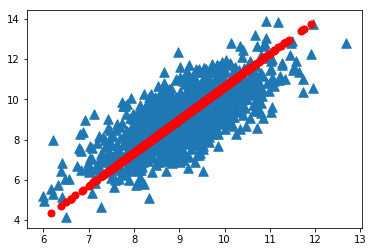

In [47]:
import matplotlib
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(np.array(dataMat[:,0]).reshape(-1,), np.array(dataMat[:,1]).reshape(-1,), marker='^', s=90)
ax.scatter(np.array(reconMat[:,0]).reshape(-1,), np.array(reconMat[:,1]).reshape(-1,), marker='o', s=50, c='red')
plt.show()

In [46]:
np.array(dataMat[:,0]).reshape(-1,)

array([10.235186, 10.122339,  9.190236,  9.306371,  8.330131, 10.152785,
       10.40854 ,  9.003615,  9.534872,  9.498181,  9.875271, 10.362276,
       10.191204,  7.720499,  9.334379,  7.963186,  8.244973,  9.569196,
        8.854793,  9.382171,  8.179055,  8.267896,  9.047165,  8.741043,
        7.190216,  8.081227,  8.04746 ,  7.917584,  8.676942,  9.210251,
        7.732998,  7.681754,  7.925863,  8.261509,  8.514872, 10.32445 ,
        7.85671 ,  7.858608,  9.196808,  9.644415,  9.579833,  7.888484,
        9.072624,  8.914184,  7.822869, 10.538554,  8.280187,  8.884223,
        9.359927,  9.078611,  7.935134,  8.805945,  9.584316, 11.269714,
        9.120444,  7.97752 ,  8.104648,  8.617126,  9.033811,  8.32768 ,
        8.532272,  9.295434,  9.905202, 10.585764, 10.427584,  9.072767,
        9.164275,  9.746058,  9.286072,  8.188233,  7.948598,  7.56335 ,
        8.972405,  9.980868,  7.75349 ,  7.431143,  8.943403, 10.48189 ,
        9.150454,  8.123894,  8.626164,  7.354185, 